In [2]:
!pip install -r requirements.txt

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Задание 1. Работа с цветовым пространством HSV.

На практике познакомились с преимуществами использования пространства `HSV`. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями `H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость`.
Используя модель `HSV` попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

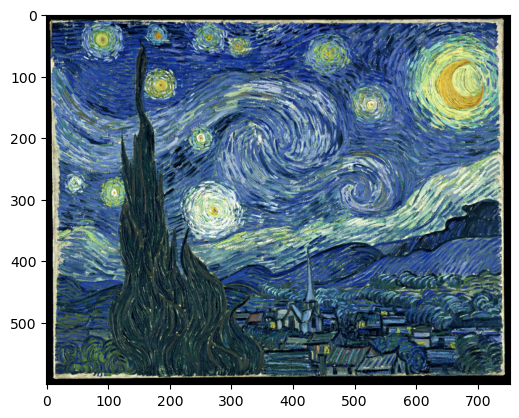

In [5]:
image = cv.imread("images/starry_night.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

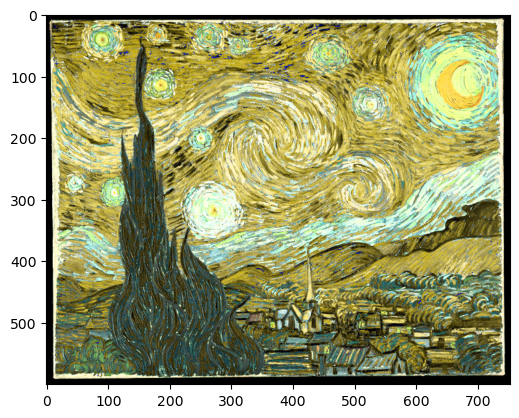

In [49]:
img_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

# Some color between orange and yellow
destination_color = 26
blue_range = 95, 115

hue_channel = img_hsv[:, :, 0]

# Scale value channel(high light)
img_hsv[:, :, 2] = np.clip(img_hsv[:, :, 2] * 1.3, 0, 255)

# Change HSV.
# Hard replace colors from Blue range to yellow-orange-like color
blue_pixels_mask = (hue_channel > blue_range[0]) & (hue_channel < blue_range[1]) 
img_hsv[blue_pixels_mask, 0] = destination_color

# Show result
image_final = cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB)
plt.imshow(image_final)
plt.show()

## Задание 2

На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

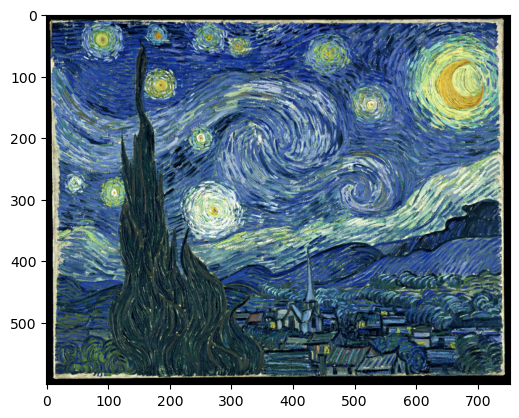

In [53]:
image = cv.imread('images/starry_night.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

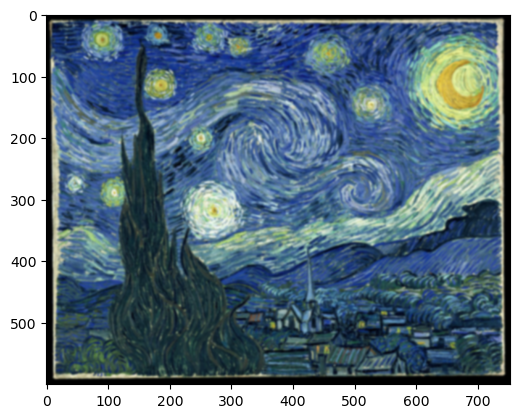

In [63]:
blurred_image = cv.GaussianBlur(image, (7, 7), 0)
plt.imshow(blurred_image)
plt.show()

Фильтр высоких частот(ядро 3х3):
$$K = \begin{bmatrix} 0 & -1.5 & 0 \\ -1.5 & 7 & -1.5 \\ 0 & -1.5 & 0 \end{bmatrix}$$

In [64]:
K = np.array([
  [   0, -1.5,    0],
  [-1.5,    7, -1.5],
  [   0, -1.5,    0]
])

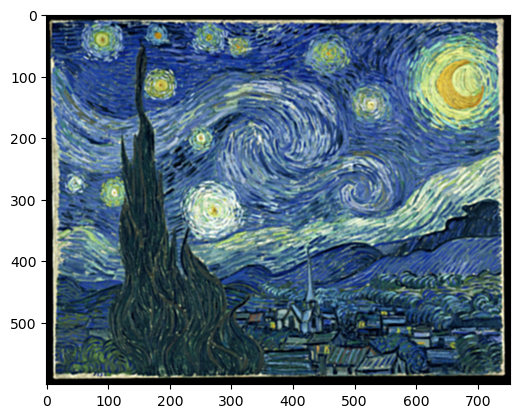

In [65]:
sharpen = cv.filter2D(blurred_image, -1, K)

plt.imshow(sharpen)
plt.show()